In [1]:
# Importing the required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('E:\Project_95\Money_Laundering_Dataset _New.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            99323 non-null   float64
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        99990 non-null   object 
 4   oldbalanceOrg   99857 non-null   float64
 5   newbalanceOrig  99978 non-null   float64
 6   nameDest        99996 non-null   object 
 7   oldbalanceDest  99948 non-null   float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         99683 non-null   float64
 10  isFlaggedFraud  99929 non-null   float64
dtypes: float64(8), object(3)
memory usage: 8.4+ MB


In [4]:
df.shape

(100000, 11)

In [5]:
print("Total number of data point :" ,df.shape[0])
print("Total number of columns :" ,df.shape[1])
print("Number of negative data poins(genuine) :",df[df["isFraud"] == 0].shape[0])
print("Number of positive data poins(fraud) :",df[df["isFraud"] == 1].shape[0])

Total number of data point : 100000
Total number of columns : 11
Number of negative data poins(genuine) : 99268
Number of positive data poins(fraud) : 415


In [6]:
# checking for null values in the given dataset
df.isna().sum()

step              677
type                0
amount              0
nameOrig           10
oldbalanceOrg     143
newbalanceOrig     22
nameDest            4
oldbalanceDest     52
newbalanceDest      0
isFraud           317
isFlaggedFraud     71
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

# Separate the columns with missing values
missing_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']

imputer = SimpleImputer(strategy='median')

# Impute the missing values
df[missing_cols] = imputer.fit_transform(df[missing_cols])

In [8]:
from sklearn.impute import SimpleImputer

# Separate the columns with missing values
missing_col1 = ['step', 'nameOrig', 'nameDest','isFraud','isFlaggedFraud']

# Create a KNN imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing values
df[missing_col1] = imputer.fit_transform(df[missing_col1])

In [9]:
# checking after performing imputation on the dataset
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.duplicated().sum() # as we can see there are no duplicates in the dataset

0

In [11]:
df.transpose().duplicated().sum()

0

In [12]:
print("Total number of data point :" ,df.shape[0])
print("Total number of columns :" ,df.shape[1])
print("Number of negative data poins(genuine) :",df[df["isFraud"] == 0].shape[0])
print("Number of positive data poins(fraud) :",df[df["isFraud"] == 1].shape[0])

Total number of data point : 100000
Total number of columns : 11
Number of negative data poins(genuine) : 99585
Number of positive data poins(fraud) : 415


In [13]:
# First moment of business decision
# before doing first moment lets rename the columns 
df = df.rename(columns={'step': 'time', 'type': 'transaction_type'})

In [14]:
df # we have changed the names of the column 

,time,transaction_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0.0,0.0
99996,10.0,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0.0,0.0
99997,10.0,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0.0,0.0
99998,10.0,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0.0,0.0


In [15]:
df.time  = df.time.astype('int64') # we are doing this as it indicate time
df.isFraud  = df.isFraud.astype('int64') # we consider it as an categorical data 
print(df.dtypes)

time                  int64
transaction_type     object
amount              float64
nameOrig             object
oldbalanceOrg       float64
newbalanceOrig      float64
nameDest             object
oldbalanceDest      float64
newbalanceDest      float64
isFraud               int64
isFlaggedFraud       object
dtype: object


In [16]:
pd.crosstab(df['transaction_type'] , df['isFraud']) # checking which transacton type has more genuine and fraud transaction

isFraud,0,1
transaction_type,,
CASH_IN,20180,5
CASH_OUT,30553,165
DEBIT,977,11
PAYMENT,39367,145
TRANSFER,8508,89


In [17]:
# Feature enginering 
print("Are there any mismatch in the balance at origin and destination after transaction?")
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the Sender:",round(df['error_orig'].value_counts()[1]/df.shape[0] * 100,2))
print("Balance Error(%) at the Receiver:",round(df['error_dest'].value_counts()[1]/df.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(data['error_orig'].value_counts()[0]/data.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(data['error_dest'].value_counts()[0]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the Sender: 98.4
Balance Error(%) at the Receiver: 92.73


In [18]:
df['newbalanceSender']= df['oldbalanceOrg'] - df['amount'].astype(float)
df['newbalanceReceiver'] = df['oldbalanceDest'] + df['amount'].astype(float)

In [19]:
df

,time,transaction_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_orig,error_dest,newbalanceSender,newbalanceReceiver
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0.0,0,1,160296.36,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0.0,0,1,19384.72,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0.0,0,1,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0.0,0,1,0.00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0.0,0,1,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0,0.0,1,1,16079.34,4020.66
99996,10,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0,0.0,1,1,1754.51,18345.49
99997,10,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0,0.0,1,1,-163674.91,238699.96
99998,10,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0,0.0,1,1,-62137.17,674872.83


In [20]:
# replace negative integers with zero using a lambda function

df['newbalanceSender'] = df['newbalanceSender'].apply(lambda x: 0 if x < 0 else x)

# print the updated DataFrame
print(df)

       time transaction_type     amount     nameOrig  oldbalanceOrg  \
0         1          PAYMENT    9839.64  C1231006815       170136.0   
1         1          PAYMENT    1864.28  C1666544295        21249.0   
2         1         TRANSFER     181.00  C1305486145          181.0   
3         1         CASH_OUT     181.00   C840083671          181.0   
4         1          PAYMENT   11668.14  C2048537720        41554.0   
...     ...              ...        ...          ...            ...   
99995    10          PAYMENT    4020.66  C1410794718        20100.0   
99996    10          PAYMENT   18345.49   C744303677        20100.0   
99997    10          CASH_IN  183774.91   C104331851        20100.0   
99998    10         CASH_OUT   82237.17   C707662966        20100.0   
99999    10          PAYMENT   20096.56  C1868032458        20100.0   

       newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0           160296.36  M1979787155            0.00            0.00  

In [21]:
# Rechecking for balance error.
print("Are there any mismatch in the balance at origin and destination after transaction?")
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] <= df["newbalanceSender"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceReceiver"]).astype(int)

print("Balance Error(%) at the Sender:",round(df['error_orig'].value_counts()/df.shape[0] * 100,2))
print("Balance Error(%) at the Receiver:",round(df['error_dest'].value_counts()/df.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(data['error_orig'].value_counts()[0]/data.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(data['error_dest'].value_counts()[0]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the Sender: 1    100.0
Name: error_orig, dtype: float64
Balance Error(%) at the Receiver: 0    100.0
Name: error_dest, dtype: float64


In [22]:
df = df.drop(['error_orig','error_dest'],axis = 1)

In [23]:
df

,time,transaction_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newbalanceSender,newbalanceReceiver
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0.0,160296.36,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0.0,19384.72,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0.0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0.0,0.00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0.0,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0,0.0,16079.34,4020.66
99996,10,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0,0.0,1754.51,18345.49
99997,10,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0,0.0,0.00,238699.96
99998,10,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0,0.0,0.00,674872.83


In [24]:
# Using drop function and removing unwanted column 
df = df.drop(['nameOrig','newbalanceOrig','nameDest','newbalanceDest','isFlaggedFraud'], axis=1)
df

,time,transaction_type,amount,oldbalanceOrg,oldbalanceDest,isFraud,newbalanceSender,newbalanceReceiver
0,1,PAYMENT,9839.64,170136.0,0.00,0,160296.36,9839.64
1,1,PAYMENT,1864.28,21249.0,0.00,0,19384.72,1864.28
2,1,TRANSFER,181.00,181.0,0.00,1,0.00,181.00
3,1,CASH_OUT,181.00,181.0,21182.00,1,0.00,21363.00
4,1,PAYMENT,11668.14,41554.0,0.00,0,29885.86,11668.14
...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,20100.0,0.00,0,16079.34,4020.66
99996,10,PAYMENT,18345.49,20100.0,0.00,0,1754.51,18345.49
99997,10,CASH_IN,183774.91,20100.0,54925.05,0,0.00,238699.96
99998,10,CASH_OUT,82237.17,20100.0,592635.66,0,0.00,674872.83


In [25]:
df = df.rename(columns={'newbalanceSender': 'newbalanceOrg', 'newbalanceReceiver': 'newbalanceDest'})
df = df[['time','transaction_type','amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest','isFraud']]
df

,time,transaction_type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,9839.64,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,1864.28,0
2,1,TRANSFER,181.00,181.0,0.00,0.00,181.00,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,21363.00,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,10,PAYMENT,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,10,CASH_IN,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,10,CASH_OUT,82237.17,20100.0,0.00,592635.66,674872.83,0


In [61]:
df['transaction_type'].value_counts()

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: transaction_type, dtype: int64

In [26]:
# we are considering the amount column to calculate 'first moment of business decision'
df['amount'].mean() # from mean value we can observe that the average transaction done in the given time peroid is "173602.22"

173602.2217641003

In [27]:
df['newbalanceOrg'].mean() # from mean value we can observe that the average account balance maintained by the customer in the given time peroid is "894061.91"

829819.244094503

In [28]:
df['amount'].mode() # from mode value we can say that the most frequent transaction amount is 2475

0     2475.13
1     6285.19
2    17320.91
3    25975.86
4    29707.86
5    89631.24
Name: amount, dtype: float64

In [29]:

df['amount'].var()

118542710414.3486

In [30]:
df['amount'].std() 

344300.3200903952

In [31]:
df['amount'].skew()

5.428317054388887

In [32]:
df['oldbalanceOrg'].skew()

4.958011018655087

In [33]:
df['newbalanceOrg'].skew()

5.044601308743025

In [34]:
df['oldbalanceDest'].skew()

5.058239113292946

In [35]:
df['newbalanceDest'].skew()

4.766103618185673

In [36]:
df['amount'].kurt()

48.099032542272205

In [37]:
df['oldbalanceOrg'].kurt()

31.579922448346124

In [38]:
df['newbalanceOrg'].kurt()

32.61692981834776

In [39]:
df['oldbalanceDest'].kurt()

32.49320051675001

In [40]:
df['newbalanceDest'].kurt()

29.197519905485514

<AxesSubplot:>

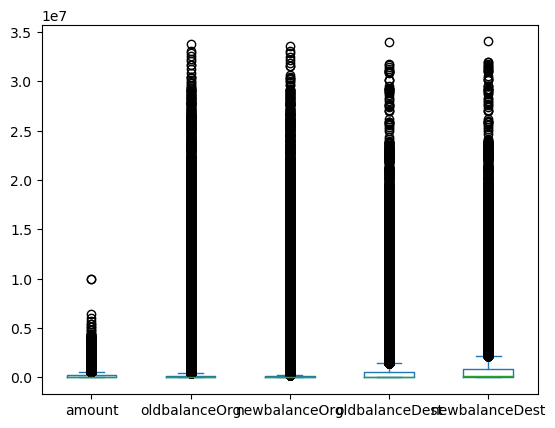

In [41]:
# creating box plot to check outliers
df[['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest']].plot(kind='box')

array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrg'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

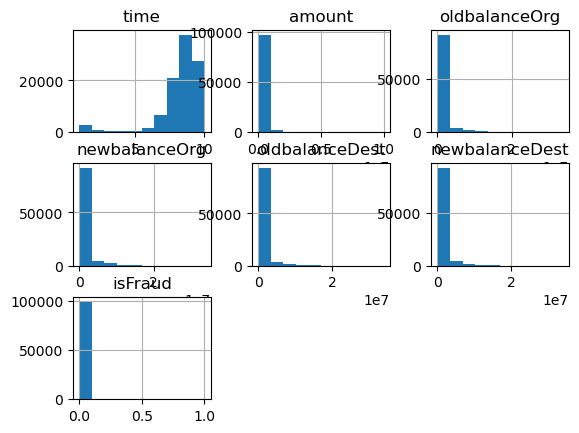

In [42]:
df.hist()

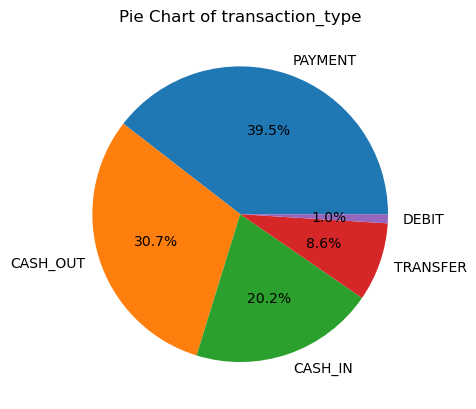

In [43]:
import matplotlib.pyplot as plt
features_object = ['transaction_type']
for column_name in features_object:
    column_data = df[column_name]
    value_counts = column_data.value_counts()
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column_name}')
    plt.show()

In [44]:
df.groupby('transaction_type')['isFraud'].sum()

transaction_type
CASH_IN       5
CASH_OUT    165
DEBIT        11
PAYMENT     145
TRANSFER     89
Name: isFraud, dtype: int64

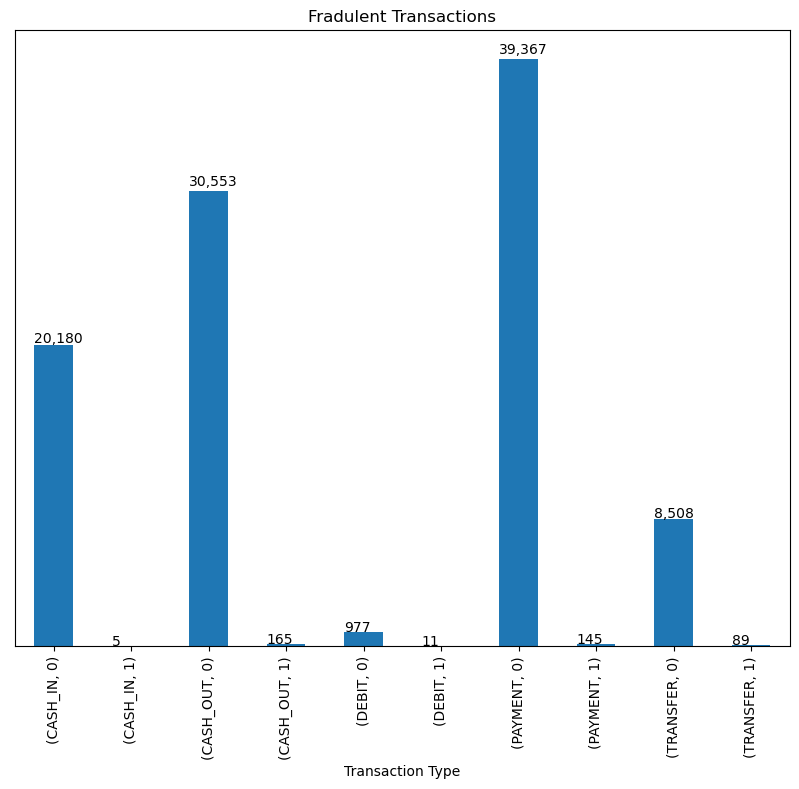

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
ax = df.groupby(['transaction_type','isFraud']).size().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.title("Fradulent Transactions")
plt.xlabel("Transaction Type")
plt.yticks([])
#plt.xticks([' Valid CashOut','Fraud CashOut','Valid Transfer','Fraud Transfer'])
plt.xticks(rotation=90)
plt.show()

In [46]:
df['time'] = pd.to_datetime("01/01/2022") + pd.to_timedelta(df['time'], unit='h')
df['time'].sample(10)

71715   2022-01-01 09:00:00
79682   2022-01-01 10:00:00
60489   2022-01-01 09:00:00
54355   2022-01-01 09:00:00
6919    2022-01-01 06:00:00
64681   2022-01-01 09:00:00
93840   2022-01-01 10:00:00
36736   2022-01-01 09:00:00
62921   2022-01-01 09:00:00
38304   2022-01-01 09:00:00
Name: time, dtype: datetime64[ns]

In [47]:
# create new column to get morning, afternoon, evening, or night
df['time'] = pd.cut(df['time'].dt.hour,
                        bins=[0, 6, 12, 18, 24], 
                        labels = ['night','morning','afternoon','evening'],
                        include_lowest = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   time              100000 non-null  category
 1   transaction_type  100000 non-null  object  
 2   amount            100000 non-null  float64 
 3   oldbalanceOrg     100000 non-null  float64 
 4   newbalanceOrg     100000 non-null  float64 
 5   oldbalanceDest    100000 non-null  float64 
 6   newbalanceDest    100000 non-null  float64 
 7   isFraud           100000 non-null  int64   
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 5.4+ MB


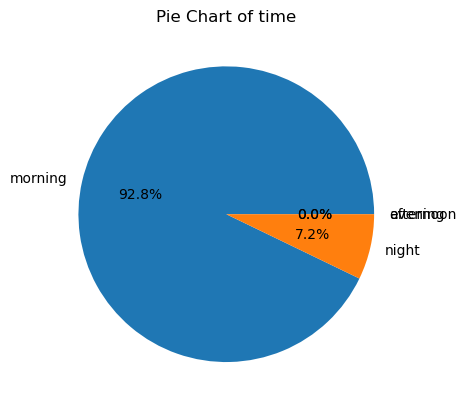

In [48]:
features_object = ['time']
for column_name in features_object:
    column_data = df[column_name]
    value_counts = column_data.value_counts()
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column_name}')
    ax.legend(column_data, loc="best")
    plt.show()

[Text(0, 0, '92836'), Text(0, 0, '7164'), Text(0, 0, ''), Text(0, 0, '')]

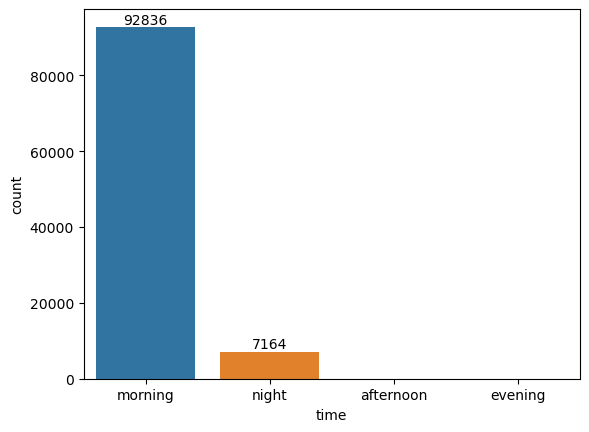

In [49]:
ax = sns.countplot(x = df['time'],
                   order = df['time'].value_counts (ascending=False).index);
abs_values = df['time'].value_counts (ascending = False).values 
                          
ax.bar_label (container=ax.containers[0], labels=abs_values)

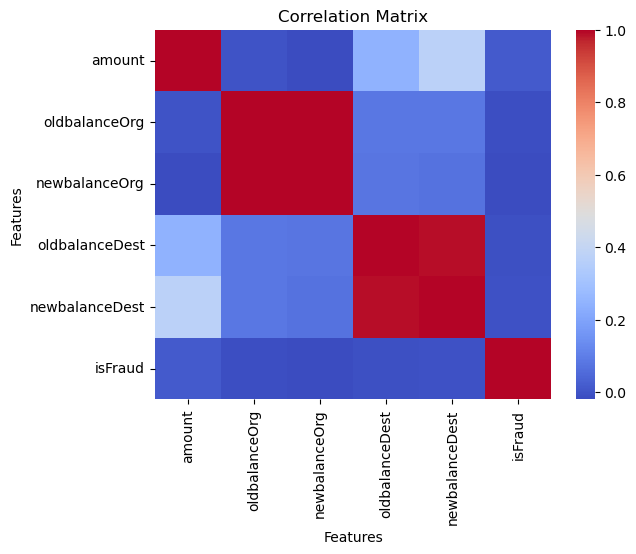

In [50]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

# Add title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

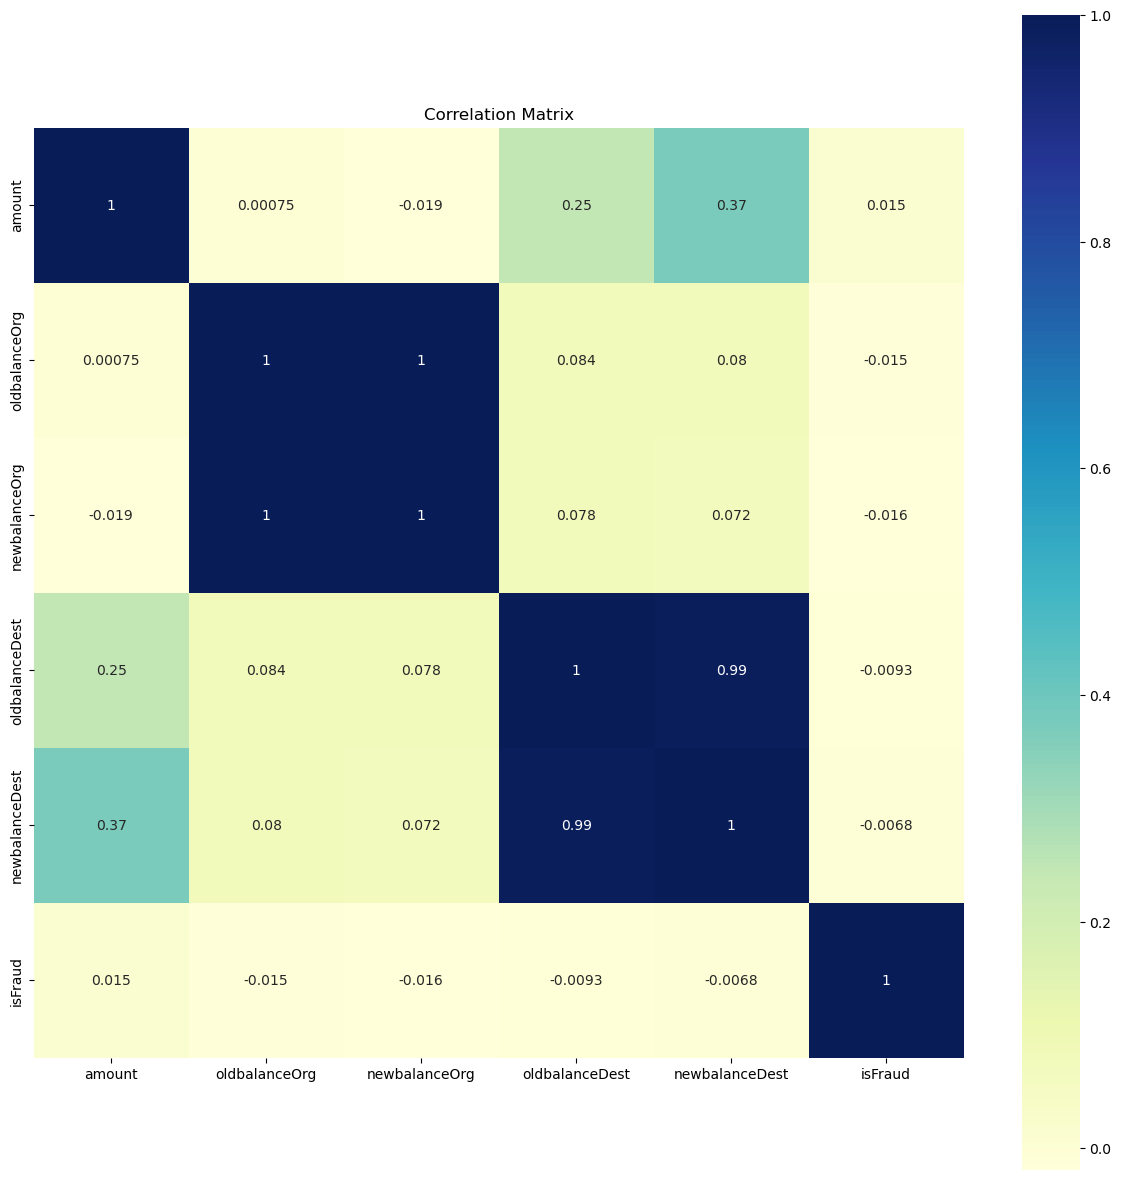

In [51]:
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")

In [52]:
df.columns

Index(['time', 'transaction_type', 'amount', 'oldbalanceOrg', 'newbalanceOrg',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   time              100000 non-null  category
 1   transaction_type  100000 non-null  object  
 2   amount            100000 non-null  float64 
 3   oldbalanceOrg     100000 non-null  float64 
 4   newbalanceOrg     100000 non-null  float64 
 5   oldbalanceDest    100000 non-null  float64 
 6   newbalanceDest    100000 non-null  float64 
 7   isFraud           100000 non-null  int64   
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 5.4+ MB


In [54]:
df1 = df.drop(['time'],axis = 1)

In [55]:
df1 

,transaction_type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,9839.64,0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,1864.28,0
2,TRANSFER,181.00,181.0,0.00,0.00,181.00,1
3,CASH_OUT,181.00,181.0,0.00,21182.00,21363.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...
99995,PAYMENT,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,PAYMENT,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,CASH_IN,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,CASH_OUT,82237.17,20100.0,0.00,592635.66,674872.83,0


In [59]:
# get all categorical columns in the dataframe
catCols = [col for col in df1.columns if df1[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    df1[item] = lb_make.fit_transform(df1[item])


In [60]:
df1

,transaction_type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.00,9839.64,0
1,3,1864.28,21249.0,19384.72,0.00,1864.28,0
2,4,181.00,181.0,0.00,0.00,181.00,1
3,1,181.00,181.0,0.00,21182.00,21363.00,1
4,3,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...
99995,3,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,3,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,0,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,1,82237.17,20100.0,0.00,592635.66,674872.83,0


In [62]:
df1['transaction_type'].value_counts()

3    39512
1    30718
0    20185
4     8597
2      988
Name: transaction_type, dtype: int64

In [68]:
# Split the data into X and y
X = df1.drop('isFraud', axis=1)
y = df1['isFraud']

In [69]:
import pandas as pd
import xgboost as xgb
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), slice(1, None))
    ])

# Define the pipeline
pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    xgb.XGBClassifier()
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
print('Accuracy on test set:', pipeline.score(X_test, y_test))

Accuracy on test set: 0.83995


In [70]:
# Save the model using pickle
filename = 'xgb_model.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

In [71]:
# loading the saved model
loaded_model = pickle.load(open('xgb_model.pkl', 'rb'))

In [74]:
## Building a Predictive System 
input_data = (3,9839.64,170136.0,160296.36,0.00,9839.64)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is dealing with money laundering')
else:
  print('The person is not dealing with money laundering')

[0]
The person is dealing with money laundering
